<a href="https://colab.research.google.com/github/sejin-sim/Practical_statistics/blob/main/1_%ED%83%90%EC%83%89%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 셋팅

In [1]:
! pip install wquantiles 

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

! git clone https://github.com/gedeck/practical-statistics-for-data-scientists.git
! cp -r /content/practical-statistics-for-data-scientists/data /content/data

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cloning into 'practical-statistics-for-data-scientists'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 363 (delta 75), reused 93 (delta 27), pack-reused 207
Receiving objects: 100% (363/363), 83.68 MiB | 23.13 MiB/s, done.
Resolving deltas: 100% (161/161), done.


- 탐색적 데이터 분석(EDA)
 1. 고전적 통계학 : 추론(적은 표본을 가지고 더 큰 모집단에 대한 결론을 도출)
 2. 과학적 통계학 : 데이터 분석(통계적 추론을 하나의 구성 요소로 본다)

<BR>

# 1. 정형화된 데이터의 요소
- 데이터 과학에서 가장 중요한 도전 : 원시 데이터를활용 가능한 형태의 정보로 변환하는 것 
- 정형 데이터의 가장 기본 종류 : 수치형 데이터, 범주형 데이터
1. 수치형 데이터 : 숫자를 이용해 표현할 수 있는 데이터
 > - 연속형 데이터 : 풍속이나 지속 시간
 > - 이산 데이터 : 사건의 발생 빈도
2. 범주형 데이터 : TV 스크린 종류(LCD, LED), 도시명(서울, 부산, 대전)
 > - 순서형 데이터 : 범주 안의 값들이 순위를 갖는 경우 (평점 1~5)
 > - 이진 데이터 : 두 값 중 하나를 갖는 경우 (0 or 1, 참 or 거짓)



#2. 테이블 데이터

- 테이블 데이터 : 데이터 분석에서 가장 대표적으로 사용되는 객체의 형태

# 3. 위치 추정 

- 위치 주정 : 값이 어디쯤에 위치하는지(중심경향성)을 나타내는 추정값
- 데이터를 살펴보는 가장 기초적인 단계 : 각 피쳐(변수)의 대푯값(typical value)을 구하는 것
 - 평균(mean) : 모든 값의 총합을 개수로 나눈 값
 - 가중평균(weighted mean) : 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값
  - 중간값(median) : 데이터에서 가장 가운데 위치한 값
  - 백분위수(percentile) : 전체 데이터의 P%를 아래에 두는 값
  - 가중 중간값(weighted median) : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
  - 절사평균(trimmed mean) : 정해진 개수의 극한 값을 제외한 나머지 값들의 평균
  - 로버스트하다(robust) : 극단값들에 민감하지 않다는 것을 의미 (=저항성 있다)
  - 특잇값(outlier) : 대부분의 값과 매우 다른 데이터 값(=극단값)

<br> 

  1. 평균
### $ 평균 = \bar{x}= \frac{\sum_{i=1}^{n} x_i}{n}$

<br> 

  2. 절사평균 : 값들을 크기 순으로 정렬 후 양끝에서 일정 개수 값들을 삭제 뒤 구한 평균
###  $ 절사평균 = \bar{x}= \frac{\sum_{i=p+1}^{n-p} x_{(i)}}{n-2p}$
  > - $p$ 개의 가장 크고 작은 값들을 제외 = 극단 값의 영향을 제거

<br> 

  3. 가중평균 : 가중치를 곱한 값들의 총합을 가중치의 총합으로 나눔
###  $ \bar{x}_w = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} w_{i}}$



## 예제

2010년 미국 각 주의 인구와 살인 비율

In [2]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
display(state.head(8))

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [3]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())          # 평균
print(trim_mean(state['Population'], 0.1)) # 절사평균
print(state['Population'].median())        # 중간값
print(np.average(state['Murder.Rate'], weights=state['Population'])) # 가중평균
print(wquantiles.median(state['Murder.Rate'], weights=state['Population'])) # 가중중간

6162876.3
4783697.125
4436369.5
4.445833981123393
4.4


# 4. 변이 추정
- 변이(variability) : 데이터 값이 얼마나 밀집 or 퍼져있는지 산포도(dispersion)를 나타냄 
 - 편차(deviation) : 관측값과 추정값 사이의 차이 (=오차, 잔차)
 - 분산(variance) : 평균과의 편차를 제곱한 값들의 합을 $n-1$로 나눈 값, $n$은 데이터 개수(=평균제곱오차)
 - 표준편차(standard deviation) : 분산의 제곱근
 - 평균절대편차(mean absolute deviation) : 평균과의 편차의 절댓값의 평균(=l1 노름, 맨해튼노름)
 - 중간값의 중위절대편차(MAD=median absolute deviation from the median) : 중간값과의 편차의 절대값의 중간값
 - 범위(range) : 데이터의 최댓값과 최솟값의 차이
 - 순서통계량(order statistics) : 최소에서 최대까지 정렬된 데이터 값에 따른 계량형(=순위)
 - 백분위수(percentile) : 어떤 값들의 P%가 이 값 혹은 더 작은 값을 갖고, (100-P)%가 이 값 혹은 더 큰 값을 갖도록 하는 값(=분위수)
 - 사분위범위(IQR=interquarile range) : 75번째 백분위수와 25번째 백분위수 사이의 차이

<br> 

1. 평균절대편차 : 편차의 절댓값(=절대편차)의 평균
## $ 평균절대편차= \frac{\sum_{i=1}^{n} \left| x_i - \bar{x} \right|}{n} $
ex) {1, 4, 4}의 평균절대편차
 - 평균 : 3(=(1+4+4)/3), 중간값 : 4, 편차 : -2, 1, 1(1-3, 4-3)
 - 절대편차 : 2, 1, 1, 평균절대편차 : (2+1+1)/3 = 1.33

<br> 

2. 분산 : 제곱편차의 평균
## $ 분산 = s^2 = \frac{\sum_{i=1}^{n} ( x_i - \bar{x} )^2}{n-1} $

<br> 
3. 표준편차 : 분산의 제곱근
## $ 표준편차 = s = \sqrt{분산} $
> - 분산과 표준편차는 제곱편차를 사용하기 때문에 특잇값에 민감

<br> 
4. 중위절대편차(MAD) : 로버스트한 변이 추정값
## $ 중위절대편차 = 중간값(\left| {x_1 - m} \right|, \left| {x_2 - m} \right|,) \dots, \left| {x_N - m} \right|) $
> - $m$ : 데이터의 중간값을 의미
> → 극단값의 영향 x → 절사평균과 유사하게 절사 표준편차 계산하는 것이 가능

5. 백분위수 : 분수 형태로 나타낸 분위수 (0.8분위수 = 80번째 백분위수)

6. 사분위범위(IQR) : 25번째 백분위수와 75번째 백분위수의 차이를 보는 것


## 예제

2010년 미국 각 주의 인구와 살인 비율

In [4]:
print(state.head(8))

# 표준편차
print(state['Population'].std())   
# 사분위범위
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
# 중위절대편차
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
6848235.347401142
4847308.0
3849876.1459979336
3849876.1459979336


# 5. 데이터 분포 탐색하기

- 데이터가 전반적으로 어떻게 분포하고 있는지 알아보는 것

In [5]:
print('<주별 살인율 백분위수>')
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

<주별 살인율 백분위수>
0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


1. 상자 그림(boxplot)


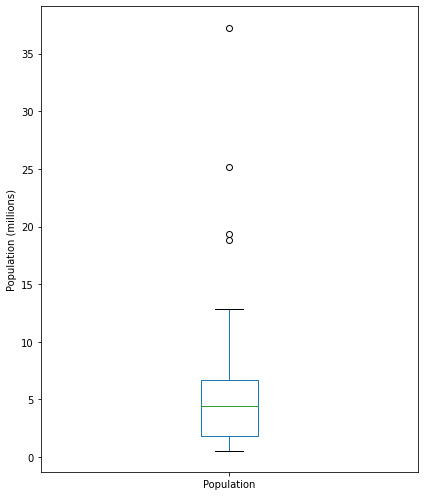

In [6]:
print("1. 상자 그림(boxplot)")
ax = (state['Population']/1_000_000).plot.box(figsize=(6, 7))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

- 상자부분의 위쪽=75%, 아래쪽=25%
- 중간값 = 상자 안 굵은 수평선
- 점선=수염(whisker) = 데이터 전체의 범위로 사분위 범위의 1.5배 이상 나가지 않도록 규칙
- 하나의 점 또는 원 = 수염 부분보다 더 바깥에 위치한 데이터

In [7]:
print("2. 도수분포표(주별 인구)")
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

2. 도수분포표(주별 인구)
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


In [8]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  ...                                             States
0    (526935.67, 4232659.0]  ...  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...
1    (4232659.0, 7901692.0]  ...          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA
2   (7901692.0, 11570725.0]  ...                                  VA,NJ,NC,GA,MI,OH
3  (11570725.0, 15239758.0]  ...                                              PA,IL
4  (15239758.0, 18908791.0]  ...                                                 FL
5  (18908791.0, 22577824.0]  ...                                                 NY
6  (22577824.0, 26246857.0]  ...                                                 TX
7  (26246857.0, 29915890.0]  ...                                                   
8  (29915890.0, 33584923.0]  ...                                                   
9  (33584923.0, 37253956.0]  ...                                                 CA

[10 rows x 3 columns]


In [12]:
min(state['Population'])

563626

- 도수분포표 : 변수의 범위를 동일한 크기의 구간으로 나눈 다음, 각 구간마다 몇 개의 변수이 존배하는지를 보여 줌
- 가장 인구가 작은 곳은 WY = 와이오밍주, 제일 많은 곳은 CA=캘리포니아로 범위가 37253956 - 563626 = 36690330 → 10개 구간으로 나눈 결과 3669033
- 563626 + 3669033 = 4232659 (첫번째 구간의 max)

3. 히스토그램(histogram)=도수분포표를 시각화


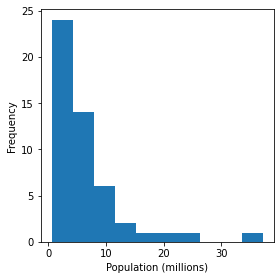

In [17]:
print("3. 히스토그램(histogram)=도수분포표를 시각화")
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

4. 밀도 그림(density plot)=데이터 분포를 연속된 선으로 보여줌


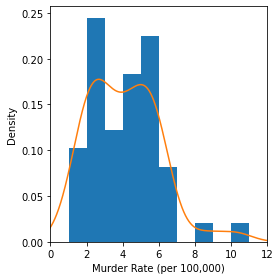

In [18]:
print("4. 밀도 그림(density plot)=데이터 분포를 연속된 선으로 보여줌")
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# 6. 이진데이터와 범주 데이터 탐색하기

예제 : 댈러스-포트워스 공항의 항공기 운행 지연 원인별 퍼센트 비율

In [20]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


1. 막대 도표(범주형 데이터 분석)


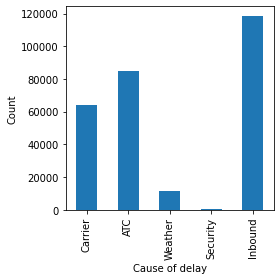

In [22]:
print('1. 막대 도표(범주형 데이터 분석)')
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- 막대도표의 x축 = 서로 다른 범주
- 히스토그램의 x축 = 수치적으로 나타낼 수 있는 하나의 변수 값

2. 최빈값 : 데이터에서 가장 자주 등장하는 값(빈도수가 가장 높음), 범주형 데이터 분석시 사용되고 수치데이터에서는 잘 사용디지 않음 (ex. inbound=귀향편)

3. 기댓값 : 범주형 데이터 중 각 범주에 해당하는 수치형 변수들이 존재하는 경우. 그 값이 일어날 확률을 서로 곱해 더한 값. 주로 요인 변수의 수준을 요약하는데 사용한다.

 > 1. 각 결과값과 발생 확률을 곱한다
 > 2. 해당 값을 모두 더한다.
 > 3. ex) EV = (0.05)(300)+(0.15)(50)+(0.80)(0) = 22.5 = 기댓값

# 7. 상관관계

1. 상관계수(=피어슨 상관계수) : -1(음) ~ +1(양)
- 두 변수 사이의 상관관계를 항상 같은 척도에 놓고 추정하는 것
## $ r = \frac{\sum_{i=1}^{n}( x_i - \bar{x} )( y_i - \bar{y} )}{(n-1)s_x s_y} $
> - $s$ = 표준편차

- 예제 : ETF 수익간의 상관관계

In [23]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [25]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY  ...       XLP       XLF       XLK
2012-07-02 -0.376098  0.096313  0.028223  ...  0.313499  0.018999  0.075668
2012-07-03  0.376099  0.481576  0.874936  ...  0.129087  0.104492  0.236462
2012-07-05  0.150440  0.096313 -0.103487  ... -0.073766 -0.142490  0.066211
2012-07-06 -0.141040 -0.491201  0.018819  ...  0.119865  0.066495 -0.227003
2012-07-09  0.244465 -0.048160 -0.056445  ... -0.064548  0.018999  0.009457

[5 rows x 17 columns]


1. 히트맵 : 상관행렬 사용 시각화


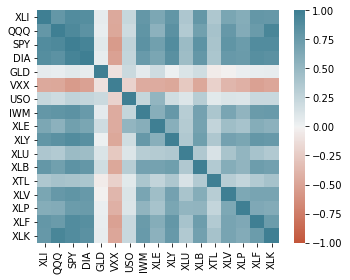

In [37]:
print('1. 히트맵 : 상관행렬 사용 시각화')
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

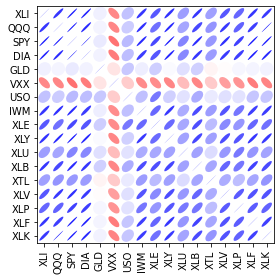

In [27]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

- SPY와 DIA는 높은 상관성을 가진다.
- 상관계수는 데이터의 특잇값에 민감
- 양의 관계 : 오른쪽으로 기움, 음의 관계 : 왼쪽으로 기움

- 산점도
- 예시 : 통신사 주가

In [29]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


2. 산점도 : AT&T와 버라이즌 수익


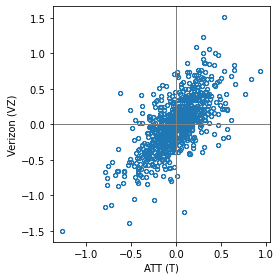

In [38]:
print('2. 산점도 : AT&T와 버라이즌 수익')
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

- 두 주식은 강한 향의 상관성을 보인다
- 이유 1 : 1 & 3사분면을 보면 함께 오르거나 떨어짐
- 이유 2 : 2 & 4사분면을 보면 반대가 되는 경우가 드뭄

# 8. 두 개 이상의 변수 탐색하기

- 산점도는 데이터의 개수가 많을 때는 시각화에 어려움이 있다. 



## 8-1. 수치형 vs 수치형 변수 시각화
- 예제 : 워싱턴주 킹 카운티의 주택시설에 대한 과세 평가 금액 (집의 크기와 과세 평가액 상관관계)

In [33]:
# 아주 비싸거나, 너무 작은 혹은 너무 큰 주택들은 제거
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


1. 육각형 구간 : 수치형 변수 vs 수치형 변수


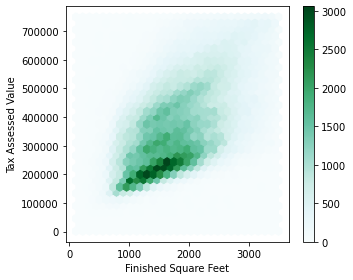

In [35]:
print('1. 육각형 구간 : 수치형 변수 vs 수치형 변수')
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

- 집의 크기와 과세 평가액을 나타낸 육각형 구간 도표, 양의 상관관계 확인 가능
- 그룹이 여러개가 있는 것을 볼 수 있다.

2. 등고선 도표


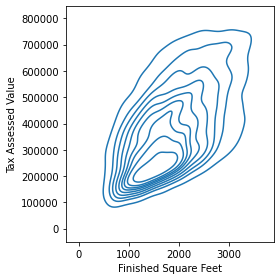

In [39]:
print('2. 등고선 도표')
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

- 꼭대기 쪽으로 갈수록 밀도가 높아짐을 의미

- **히트맵, 육각 구간, 등고도표 : 이차원상의 밀도 시각화에 사용**

## 8-2. 범주형 vs 범주형 변수 시각화

- 예제 : 개인대출 등급과 대출 경과

In [43]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)

df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print('<대출 등급과 상황에 대한 분할표>')
print(perc_crosstab)

<대출 등급과 상황에 대한 분할표>
status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


- 개인대출 등급 : A(높)~G(낮)
- Fully Paid : 전액 상환
- Charged Off : 삭제(=대출 잔여금 회수 불능)

## 8-3. 범주형 vs 수치형 변수 시각화

- 예제 : 항공기 원인에 따른 지연 비율

1. 상자 그림 : 항공사별 비행 지연 정도 비교


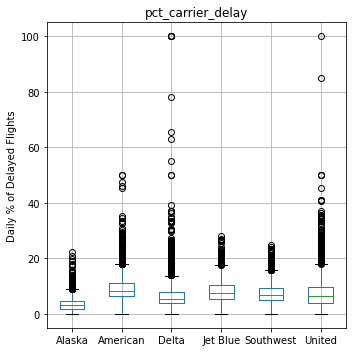

In [47]:
print("1. 상자 그림 : 항공사별 비행 지연 정도 비교")

import warnings
warnings.filterwarnings("ignore")

airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

- 범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화 하여 비교
- Alaska 항공이 지연이 제일 적고, America 항공의 지연이 가장 많음

2. 바이올린 도표 : 밀도추정 결과를 동시에 시각화


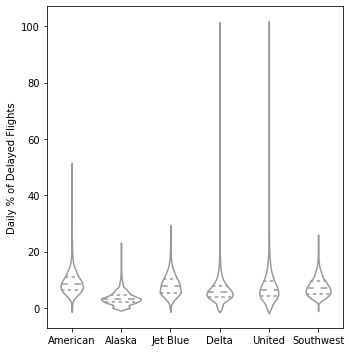

In [49]:
print("2. 바이올린 도표 : 밀도추정 결과를 동시에 시각화")
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

- 이전과는 다르게 Delta 항공이 거의 0 근처에 데이터가 집중 되어 있음을 볼 수 있음(상자 그림에서 볼 수 없음)

## 8-4. 다변수 시각화
- 조건화 : 조건변수를 지정
- 예제 : 주택 크기와 과세평가액 비교
- ㄴ 확장을 위해 변수를 비교, 지리적 요인을 살피며 우편번호별 데이터를 묶어봄

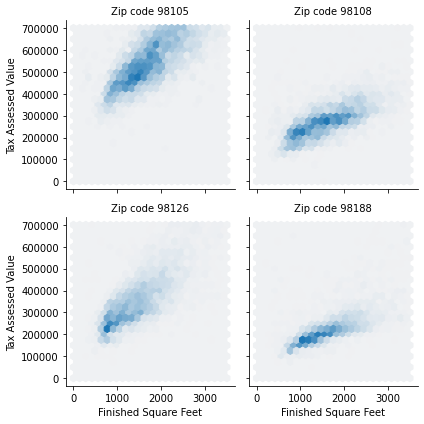

In [50]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

- 우편번호 98105, 98126에서 다른 우편번호보다 평가액이 더 높다는 것을 볼 수 있다.